# Classification of  Computer viruses using Machine Learning by Aamir Hamid (Wx28618)
#### In this notebook, we're going to go through an machine learning project with the goal of classifying the type of computer virus.
#### Since we're trying to classify an entity, this kind of problem is known as a Classification problem.
#### The data and evaluation metric we'll be using (Accuracy, Precision,F1 and Recall) .
#### What we'll end up with a model that can classsify a computer virus with 90% Acccuracy.
#### Since we already have a dataset, we'll approach the problem with the machine learning modelling framework.

## To work on this problem, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

#### We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which classifies a computer virus given different characteristics about it.

# 1. Problem Definition
### For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

### How well can we classify a computer virus, given its characteristics previous examples of how much similar viruses behave?

# 2. Data
### Looking at the dataset , we can see  it's a classification problem. .

### In this case, it's historical  data of computer viruses. Including things like, Virtual,Offset,loc,Imports and more

### There is only 1 dataset with following sub-sets:

### Training set
### Testing set
# 3. Evaluation
### For this problem,the evaluation metric to being (Accuracy, Precision,F1 and Recall). As with many classification evaluations, the goal will be to get this value as High as possible.


# 4. Features
### Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.
### Another approach would be to check if we can decrease the number of features using feature extraction

### One of the most common ways to do this, is to create a data dictionary.

### First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to maximize, our first goal will be building a baseline model.

In [1]:
## Importing the data and preparing it for modelling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [3]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

### Now we've got our tools for data analysis ready, we can import the data and start to explore it.

In [4]:
# Creating a dataframe from the given csv file of viruses

virus_df=pd.read_csv(r"C:\Users\aamir\Downloads\data602_exam.csv")

In [5]:
#Shuffling the data for generalization
virus_df=virus_df.sample(frac=1)

In [6]:
# Checking the first 10 rows of our dataframe
virus_df.head(10)

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
467,3.0,3.00000,1907.0,6.0,6808.427368,45223.184201,2.000000,15.000000,7.0,23.0,...,202578.910915,-45031.357039,175043.382331,78369.323319,139943.300538,-41551.612057,32138.793466,229365.00000,232116.0,2
4887,8.0,8.00000,188.0,9.0,3.000000,164.000000,3.000000,37.000000,2.0,66.0,...,-127265.764499,96140.192109,-25575.047481,-4380.811662,-67647.255265,32881.086058,40620.609410,57808.00000,51146.0,8
4628,3.0,57540.58441,1142.0,9.0,3.000000,745.000000,3.000000,11.000000,6.0,15.0,...,28695.646949,90942.416665,10464.895455,58725.415386,134001.480227,258436.667259,4286.751387,67789.00000,39262.0,6
1234,3.0,3.00000,33.0,0.0,4.000000,34.000000,7912.484562,3.000000,0.0,15.0,...,99038.833694,85974.703246,84754.198589,92200.552383,53865.100219,-126954.254985,144921.569624,68856.00000,65957.0,3
2951,3.0,3.00000,311.0,18.0,6.000000,623.000000,6.000000,82932.400134,4.0,55.0,...,-32053.541193,102852.397117,101996.661691,-8368.695565,191814.875286,-290228.104785,105481.403001,40468.31972,3252.0,8
3096,3.0,3.00000,2182.0,30.0,10.000000,488.000000,10.000000,16127.136836,10.0,35.0,...,-83032.130838,83090.781963,261461.525065,-6445.721893,95247.932411,-156722.049908,68055.121947,5603.00000,2253.0,8
4956,3.0,3.00000,37.0,0.0,4.000000,32.000000,0.000000,6.000000,0.0,13.0,...,-77985.414951,79224.701533,85320.211638,67765.523151,8359.896251,-67260.712388,-112170.485509,139160.00000,131958.0,3
3365,3.0,3.00000,666.0,15.0,5.000000,1574.000000,98287.802233,6.000000,7.0,30.0,...,148614.397990,-230722.388161,-118125.665372,115509.080697,-264729.794449,9554.360371,60026.293634,7617.00000,6510.0,8
2636,4.0,4.00000,2383.0,0.0,3.000000,344.000000,0.000000,21.000000,11.0,39.0,...,131013.646968,-106667.377545,-72527.523070,23240.284902,114127.284436,-29894.630535,19166.627569,92644.00000,58429.0,2
1389,3.0,3.00000,133.0,12.0,4.000000,34.000000,4.000000,8.000000,0.0,10.0,...,131371.606193,-78931.467874,-73589.470947,-36027.381769,-125680.806585,11448.318752,-45228.882653,72276.00000,68483.0,3


In [7]:
# Describing the shape of dataframe
virus_df.shape

(4999, 1805)

## The data we have has 4999 rows and 1805 columns

In [8]:
# Checking the statistical measures of the data
virus_df.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2413.316145,2659.311487,4424.891220,2291.214822,2512.272757,3470.164710,2612.176503,2472.228927,2554.660865,2452.442360,...,14331.213118,9358.953517,23654.548237,8540.786955,17432.020184,22032.274639,9505.453675,70574.781259,54803.742148,4.086817
std,12506.374487,13159.966494,13604.624599,11996.827931,12656.467627,12442.838259,13026.935701,12695.076990,12533.327183,12280.398873,...,108685.996366,107161.612891,109735.456647,105281.088434,107423.247504,109858.578170,106876.987983,67871.038272,53395.251409,2.677785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-399471.378431,-344924.897141,-348906.065760,-379757.698729,-345576.170139,-410986.193796,-355679.953652,0.000000,0.000000,1.000000
25%,3.000000,3.000000,77.000000,6.000000,4.000000,37.000000,2.000000,6.000000,0.000000,13.000000,...,-57945.624535,-63567.620933,-50475.672159,-63194.878910,-55114.830841,-50016.264131,-63550.766114,13387.000000,8117.000000,2.000000
50%,3.000000,3.000000,526.000000,12.000000,4.000000,407.000000,4.000000,12.000000,5.000000,20.000000,...,13494.353190,9797.650967,22385.687582,10410.067259,18424.422329,21454.161075,9709.062906,67890.000000,49865.000000,3.000000
75%,4.000000,4.000000,1977.500000,18.000000,7.000000,1330.500000,6.000000,18.000000,9.000000,38.000000,...,87246.586847,82454.969088,95044.827729,80084.458079,87543.264657,96288.509357,82107.827536,88771.000000,68589.500000,6.000000
max,99416.349008,99973.742656,107775.000000,99364.479576,99838.164777,100278.830725,99673.225000,100002.864718,99039.014532,99262.954988,...,500390.536696,358149.487611,465889.867881,364890.436486,389119.972128,443685.869973,437127.690431,412076.355373,300241.000000,9.000000


In [9]:
# Checking for the missing value 
## If the data is missing we will use imputation 
## if the data is not missing we will caary on

virus_df.isna().sum()

Virtual    0
Offset     0
loc        0
Import     0
Imports    0
          ..
Img104     0
Img105     0
Img106     0
Img107     0
target     0
Length: 1805, dtype: int64

# Since no data is missing we will not use imputation here.

In [10]:
# Checking for the number of target classes and thier values
virus_df["target"].value_counts()

3    1344
2    1060
1     696
8     559
9     472
6     371
4     233
7     192
5      72
Name: target, dtype: int64

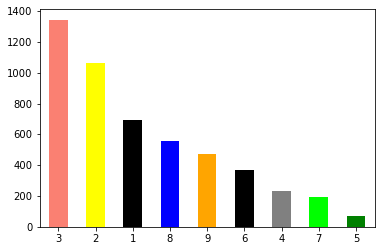

In [11]:
# Creating a bar graph to visualize the target class distribution
virus_df["target"].value_counts().plot.bar(color=['salmon', 'yellow', 'black', 'blue', 'orange','black','grey','lime','green'])
plt.xticks(rotation=0);

In [12]:
# Creating baseline classifiers to check which machine learning model performs well
## The top model will be used.

In [13]:
# Creating X,y for splitting the data in train and test set
X=virus_df.drop("target",axis=1)
y=virus_df["target"]

In [14]:
# Creating a train test split
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X,y)

In [15]:
### We are choosing five different classification models to check for the best model for our problem

In [16]:
# Creating a dictionary of top classification models to check for the highest performing model
models={"lr":LogisticRegression(solver="saga"),
"rtc":RandomForestClassifier(),
"nb":KNeighborsClassifier(),
"gb":GradientBoostingClassifier(),
"dt":DecisionTreeClassifier()}
modelscore={}


In [17]:
# Training first 500 rows as it takes a huge time to train the model for whole data set
for name,model in models.items():
    model.fit(X_train_b,y_train_b)
    modelscore[name]=model.score(X_test_b,y_test_b)

C:\Users\aamir\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


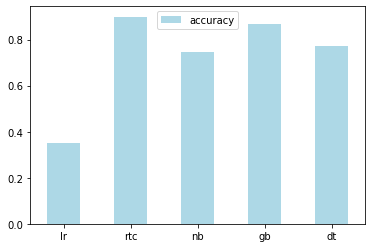

In [18]:
# Comparing the performance of the model using bar graph 
modelcompare=pd.DataFrame(modelscore,index=["accuracy"])
modelcompare.T.plot.bar(color="lightblue")
plt.xticks(rotation=0);

In [19]:
# Checking the actual score
print(modelscore)

{'lr': 0.3504, 'rtc': 0.8992, 'nb': 0.744, 'gb': 0.8656, 'dt': 0.772}


## Here we can observe two models which perform really well are Random Forest cLassifier *( 0.9168) and Gradient boost classifer *(0.8688)
### Both the models follow ensemble approach which Ensemble methods which is a machine learning technique that combines several base models in order to produce one optimal predictive model

In [20]:
#Scaling data for better and Faster convergence
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)

# The number of features for this dataset are large so we will use feature selection to use the important features only.

#### We use feature selection beacause:
#### Decreases over-fitting: Less redundant data means less chances of making decisions based on noise.
#### Reduces training time: Less data means that the algorithms train sooner.
#### Improved accuracy: Less ambiguous data means improvement of modeling accuracy.

In [21]:
# importing chi2,mutual_info_classif,GenericUnivariateSelect 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect

In [22]:
# using mutual info to create a list with important feature values
mutual_info = mutual_info_classif(X_scaled, y)
print(mutual_info)


[0.20230611 0.2180853  0.69405203 ... 0.         0.92298582 0.9523895 ]


In [23]:
mutual_info.shape


(1804,)

In [24]:
# Creating a train test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y)

In [25]:
# Checking for best number of parameters for our model 

parmeters=[10,50,100,200,400,800,1500]

for params in parmeters:

    mf_select = GenericUnivariateSelect(score_func=mutual_info_classif, mode="k_best", param=params)
    mf_select.fit(X_train, y_train)    #fit to the data
    X_transformed = mf_select.transform(X_scaled)    #transform data to the selected feature space
    print(X_transformed.shape)
    RFC = RandomForestClassifier()
    print(f"Ran. Forrest k={params}: ", cross_val_score(RFC, X_transformed, y, cv=5).mean())

(4999, 10)
Ran. Forrest k=10:  0.8765771771771771
(4999, 50)
Ran. Forrest k=50:  0.8941805805805807
(4999, 100)
Ran. Forrest k=100:  0.9003823823823824
(4999, 200)
Ran. Forrest k=200:  0.9019823823823824
(4999, 400)
Ran. Forrest k=400:  0.9045827827827828
(4999, 800)
Ran. Forrest k=800:  0.9073831831831832
(4999, 1500)
Ran. Forrest k=1500:  0.9061829829829829


In [26]:
importances = models['rtc'].feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

In [27]:
# important features
for feature in zip(virus_df.columns, models['rtc'].feature_importances_):
    print(feature)


('Virtual', 0.00035527004605683595)
('Offset', 0.00010514386875926118)
('loc', 0.0005331758590167107)
('Import', 0.00037484238153915743)
('Imports', 0.0009134464871890881)
('var', 0.0008760775953370718)
('Forwarder', 0.0002488614055804839)
('UINT', 0.00040466077945894725)
('LONG', 0.00045278417406208844)
('BOOL', 0.0012735106393182134)
('WORD', 2.9567366221740155e-05)
('BYTES', 0.0020308584969366624)
('large', 0.0004530017375434201)
('short', 0.002534083237475459)
('dd', 0.0006513452144986671)
('db', 0.001036809165426194)
('dw', 0.0006475613596154877)
('XREF', 0.0004425435084417081)
('ptr', 0.0012623675124443516)
('DATA', 0.0024834239607718703)
('FUNCTION', 0.0011455622929985526)
('extrn', 0.0007355382198965754)
('byte', 0.00045217544302994034)
('word', 0.0013145712605499987)
('dword', 0.00116947486327713)
('char', 0.0015417431397277935)
('DWORD', 0.0004283981651371956)
('stdcall', 0.0006692247482077252)
('arg', 0.0022534227338353806)
('locret', 0.00031372403661570497)
('asc', 0.001808

## Looking at the parameter values its more feasible to have 50 features as the accuracy is very close to other high parameter models. 

In [28]:
## Choosing param value to be 10
mf_select = GenericUnivariateSelect(score_func=mutual_info_classif, mode="k_best", param=50)
mf_select.fit(X_train, y_train)    #fit to the data
X_transformed = mf_select.transform(X_scaled)    #transform data to the selected feature space
print(X_transformed.shape)
RFC = RandomForestClassifier()
print("Ran. Forrest k=100: ", cross_val_score(RFC, X_transformed, y, cv=5).mean())

(4999, 50)
Ran. Forrest k=100:  0.8959803803803803


In [29]:
# Creating Another train test set for the new transformed dataset 
# Creating a train test split
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.20)

In [30]:
# Printing the shape of our data
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3999, 50) (1000, 50) (3999,) (1000,)


## From this point we will use the data set with 50 features which we got from the above cell

#  We will use Random Forest classifier and will fine tune it 
### Random forests have been observed to overfit for some datasets with noisy classification/regression tasks.
### Unlike decision trees, the classifications made by random forests are difficult for humans to interpret.
### For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data. Methods such as partial permutations were used to solve the problem.,
### If the data contain groups of correlated features of similar relevance for the output, then smaller groups are favored over larger groups.
#### we will also check if this model performs well when fine tunned

# Model Hyper Parameter Tunning
### We will use RandomizedSearchCV to tune the hyper-parameters

#### Hyperparameter tuning is a vital aspect of increasing model performance. Given a complex model with many hyperparameters,effective hyperparameter tuning may drastically improve performance.

In [31]:
# Creating RandomizedSearchCV parameter values
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Criterion
criterion=["gini","entropy"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion':criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [33]:
# Printing the best hyper parameters for the Random forest classifier
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'entropy',
 'bootstrap': True}

In [34]:
# Checking the accuracy on test set
Test_score=rf_random.score(X_test,y_test)

In [35]:
print(f"The test score of the model {Test_score*100}%" )

The test score of the model 91.4%


#### It seems Random Forest Classifier works better for our data because of following factors:-
#### The data given was all numerical with any catogorical data.
#### The random forest algorithm is significantly more accurate than most of the non-linear classifiers.
#### This algorithm is also very robust because it uses multiple decision trees to arrive at its result.
#### The random forest classifier doesn’t face the overfitting issue because it takes the average of all predictions, canceling out the biases and thus, fixing the overfitting problem.
#### Random forests don’t let missing values cause an issue. They can use median values to replace the continuous variables or calculate the proximity-weighted average of the missing values to solve this problem. 
#### This algorithm offers you relative feature importance that allows you to select the most contributing features for your classifier easily. 

In [36]:
# predicting the values and making prediction array
y_pred=rf_random.predict(X_test)

In [37]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.95      0.92       153
           2       0.92      0.96      0.94       226
           3       0.94      0.98      0.96       274
           4       0.90      0.87      0.89        31
           5       0.60      0.20      0.30        15
           6       0.92      0.80      0.85        84
           7       0.92      0.74      0.82        31
           8       0.87      0.88      0.88       102
           9       0.93      0.88      0.90        84

    accuracy                           0.91      1000
   macro avg       0.88      0.81      0.83      1000
weighted avg       0.91      0.91      0.91      1000



#### Classification Report Provides us with precision ,recall,f1 for all the target classes

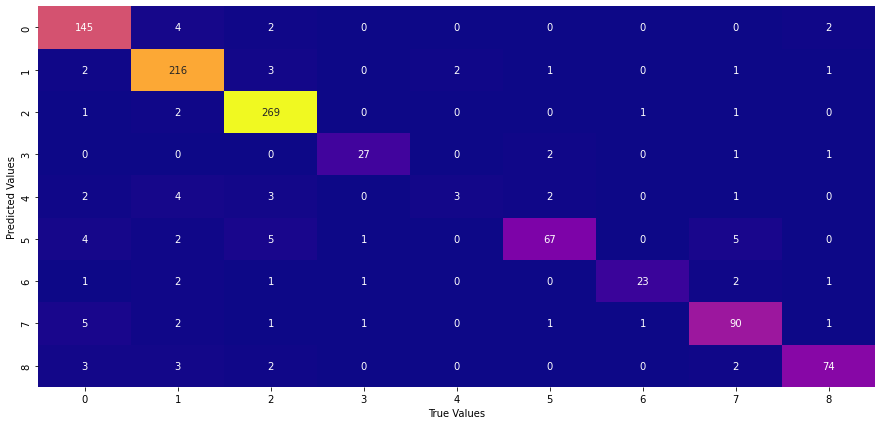

In [38]:
# CREATING GOODLOOKING CONFUSION MATRIX USING SEABORN
import seaborn as sns
def plot_conf_matrix(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(15,7))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),cmap="plasma",annot=True,cbar=False,fmt='g')
    plt.ylabel("Predicted Values")
    plt.xlabel("True Values")
plot_conf_matrix(y_test,y_pred)

# Using Gradient boost algorithm to check if it might work better than Random Forrest Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
print(GradientBoostingClassifier())

GradientBoostingClassifier()


In [40]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [41]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5,verbose=2)
cv.fit(X_train[:1000],y_train[:1000])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.9s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.9s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.9s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.9s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=250; total time=   5.3s
[CV] END ..learning_rate=0.01, max_depth=1, n_

[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=50; total time=   1.2s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=250; total time=   6.2s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=250; total time=   6.0s
[CV] END ...learning_rate=0.1, max_depth=1, n_estimators=250; total time=   6.0s
[CV] END ...learning_rate=0.

[CV] END .......learning_rate=1, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END .......learning_rate=1, max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ......learning_rate=1, max_depth=1, n_estimators=50; total time=   1.0s
[CV] END ......learning_rate=1, max_depth=1, n_estimators=50; total time=   1.0s
[CV] END ......learning_rate=1, max_depth=1, n_estimators=50; total time=   1.0s
[CV] END ......learning_rate=1, max_depth=1, n_estimators=50; total time=   1.0s
[CV] END ......learning_rate=1, max_depth=1, n_estimators=50; total time=   1.2s
[CV] END .....learning_rate=1, max_depth=1, n_estimators=250; total time=   5.4s
[CV] END .....learning_rate=1, max_depth=1, n_estimators=250; total time=   5.2s
[CV] END .....learning_rate=1, max_depth=1, n_estimators=250; total time=   5.6s
[CV] END .....learning_rate=1, max_depth=1, n_estimators=250; total time=   5.6s
[CV] END .....learning_rate=1, max_depth=1, n_estimators=250; total time=   5.1s
[CV] END .....learning_rate=

[CV] END .....learning_rate=10, max_depth=1, n_estimators=50; total time=   1.2s
[CV] END .....learning_rate=10, max_depth=1, n_estimators=50; total time=   1.2s
[CV] END .....learning_rate=10, max_depth=1, n_estimators=50; total time=   1.3s
[CV] END .....learning_rate=10, max_depth=1, n_estimators=50; total time=   1.5s
[CV] END .....learning_rate=10, max_depth=1, n_estimators=50; total time=   1.2s
[CV] END ....learning_rate=10, max_depth=1, n_estimators=250; total time=   6.3s
[CV] END ....learning_rate=10, max_depth=1, n_estimators=250; total time=   6.4s
[CV] END ....learning_rate=10, max_depth=1, n_estimators=250; total time=   6.6s
[CV] END ....learning_rate=10, max_depth=1, n_estimators=250; total time=   6.3s
[CV] END ....learning_rate=10, max_depth=1, n_estimators=250; total time=   6.9s
[CV] END ....learning_rate=10, max_depth=1, n_estimators=500; total time=  13.0s
[CV] END ....learning_rate=10, max_depth=1, n_estimators=500; total time=  12.6s
[CV] END ....learning_rate=1

[CV] END ....learning_rate=100, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ....learning_rate=100, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ....learning_rate=100, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ...learning_rate=100, max_depth=1, n_estimators=250; total time=   6.4s
[CV] END ...learning_rate=100, max_depth=1, n_estimators=250; total time=   6.1s
[CV] END ...learning_rate=100, max_depth=1, n_estimators=250; total time=   6.4s
[CV] END ...learning_rate=100, max_depth=1, n_estimators=250; total time=   6.0s
[CV] END ...learning_rate=100, max_depth=1, n_estimators=250; total time=   6.1s
[CV] END ...learning_rate=100, max_depth=1, n_estimators=500; total time=  12.5s
[CV] END ...learning_rate=100, max_depth=1, n_estimators=500; total time=  13.1s
[CV] END ...learning_rate=100, max_depth=1, n_estimators=500; total time=  12.7s
[CV] END ...learning_rate=100, max_depth=1, n_estimators=500; total time=  12.7s
[CV] END ...learning_rate=10

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             verbose=2)

In [42]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}


0.269 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.714 + or -0.025 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.813 + or -0.023 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.833 + or -0.023 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.458 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.779 + or -0.035 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.827 + or -0.017 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.829 + or -0.016 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.443 + or -0.011 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.766 + or -0.028 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.815 + or -0.019 for the {'learning_rate': 0.01, 'max_

In [43]:
# Checking the test score on the model
cv.score(X_test,y_test)

0.862

### AS Looking at the models we conclude that Random forrest classifier is the best model for this problem and we are using that model .

# Summary of the work

### Random Forrest Classifier is the model I choose for this data as it performed significantly better than other models. The only other model that came close to this was Gradient Boost .